In [13]:
import numpy as np
import pandas as pd
import statistics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
datos_ecopetrol = pd.read_excel(r"C:\Users\NIGOJ\OneDrive\Desktop\NICO\MAF\Semestre 3\Inversiones en Mercado de Capitales\Archivos Excel\Beta Ecopetrol.xlsx", sheet_name = 'ARG_Historical_Data') # path to file + file name

datos_ecopetrol.head()  # print first 5 rows of the dataframe

,Date,Ecopetrol,Retorno Ecopetrol,Colcap,Retorno Colcap,TES 5y (anual),TES 5y (semanal),rECOP - rf,rCOLCAP - rf
0,2010-04-04,2725,0.0093,1468.95,0.019700,0.07338,0.001363,0.007937,0.018337
1,2010-04-11,2690,-0.0128,1463.27,-0.003867,0.07324,0.001360,-0.014160,-0.005227
2,2010-04-18,2780,0.0335,1488.05,0.016935,0.07324,0.001360,0.032140,0.015574
3,2010-04-25,2765,-0.0054,1467.26,-0.013971,0.07369,0.001368,-0.006768,-0.015340
4,2010-05-02,2670,-0.0344,1412.80,-0.037117,0.07165,0.001332,-0.035732,-0.038448


In [15]:
y = datos_ecopetrol['rECOP - rf'] # dependent variable
X = datos_ecopetrol['rCOLCAP - rf'] # independent variable

In [28]:
# Now let’s add a constant and fit the model.

X1 = sm.add_constant(X) # adding a constant
OLS_model = sm.OLS(y, X1).fit() # fitting the model

OLS_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rECOP - rf   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     721.4
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          4.31e-108
Time:                        18:48:05   Log-Likelihood:                 1319.3
No. Observations:                 665   AIC:                            -2635.
Df Residuals:                     663   BIC:                            -2626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0011      0.001      0.851      0.395      -0.001       0.004
rCOLCAP - rf     1.2831      0.048     26.859      0.000       1.189       1.377
==============================================================================
Omnibus:                      122.889   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.198
Skew:                           0.485   Prob(JB):                    7.34e-268
Kurtosis:                       9.592   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
residual_values = OLS_model.resid # residual values

In [30]:
residual_values.head(8)

0   -0.016692
1   -0.008555
2    0.011055
3    0.011812
4    0.012499
5   -0.003104
6    0.000823
7   -0.015401
dtype: float64

In [31]:
predicted = y - residual_values
predicted

0      0.024629
1     -0.005605
2      0.021084
3     -0.018581
4     -0.048231
         ...   
660   -0.027382
661   -0.006761
662   -0.027399
663    0.041659
664    0.032395
Length: 665, dtype: float64

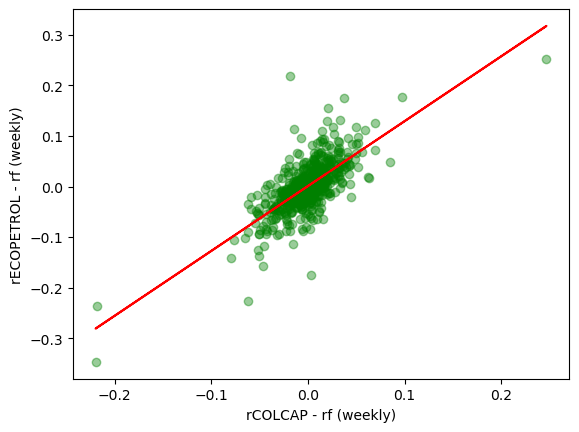

In [32]:
#use green as color for individual points
plt.plot(X, y, 'o', color='green', alpha = 0.4)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#use red as color for regression line
plt.plot(X, m*X+b, color='red')

#add axis labels
plt.xlabel('rCOLCAP - rf (weekly)')
plt.ylabel('rECOPETROL - rf (weekly)')

plt.show()

In [33]:
# print("Variance of residuals is % s"
  #    %(statistics.variance(residual_values)))

In [34]:
var_residuals = np.var(residual_values)
print(f"Variance of residuals is {var_residuals}")

Returns_Ecopetrol = datos_ecopetrol['Retorno Ecopetrol'] # Extraemos los retornos de Ecopetrol para calcular la varianza
var_ecopetrol = np.var(Returns_Ecopetrol)
print(f"Variance of Ecopetrol is {var_ecopetrol}")

Returns_Colcap = datos_ecopetrol['Retorno Colcap'] # Extraemos los retornos del Colcap para calcular su varianza
var_mercado = np.var(Returns_Colcap)
print(f"Variance of Colcap *Market* is {var_mercado}")

Variance of residuals is 0.0011075752965142584
Variance of Ecopetrol is 0.0023119157932274302
Variance of Colcap *Market* is 0.0007311725825676145


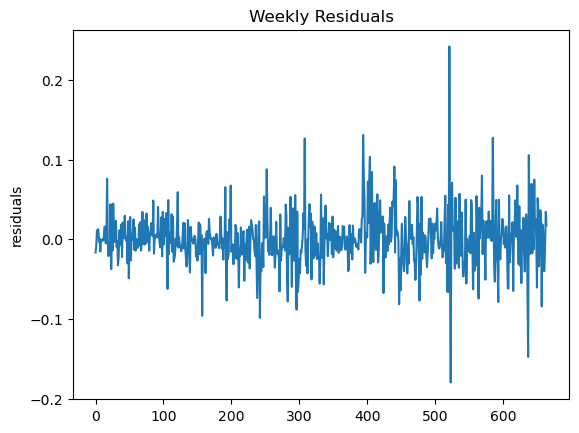

In [35]:
# plotting the points 
plt.plot(residual_values)
  
# naming the x axis
# plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('residuals')
  
# giving a title to my graph
plt.title('Weekly Residuals')
  
# function to show the plot
plt.show()

In [36]:
Beta = OLS_model.params[1]
Beta

1.2830708260203976

In [37]:
print(f"Total Risk = {var_ecopetrol}")
print(f"Systemic Risk = {var_mercado*Beta**2}")

print(f"Idiosincratic Risk = {var_residuals}")

Total Risk = 0.0023119157932274302
Systemic Risk = 0.0012037080319234794
Idiosincratic Risk = 0.0011075752965142584


In [38]:
print(f"% del riesgo total que corresponde a riesgo sistémico = {var_mercado*Beta**2/var_ecopetrol}")

% del riesgo total que corresponde a riesgo sistémico = 0.5206539249611273
